# Pymaceuticals Inc.
---

### Analysis

- Male mice are more common in this dataset than female mice, however they are generally equal.
- Capomulin and Ramicane have the highest mice count than all other treatments.
- The outliers in treatments Infubinol and Ceftamin are more drastic than Capomulin and Ramicane.
- There is a positive correlation between mouse weight and tumor volume.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study1_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study1_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = mouse_study1_df["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_study1_df.loc[mouse_study1_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_info = mouse_study1_df.loc[mouse_study1_df["Mouse ID"] == "g989", :]
dupe_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study1_df.loc[mouse_study1_df["Mouse ID"] != "g989"]
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice = mouse_study_df["Mouse ID"].nunique()
mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).mean()
median = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).median()
variance = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).var()
standard_deviation = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).std()
sem = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                          "Median Tumor Volume": median,
                          "Tumor Volume Variance": variance,
                          "Tumor Volume Std. Dev.": standard_deviation,
                          "Tumor Volume Std. Err.": sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).mean()
median = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).median()
variance = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).var()
standard_deviation = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).std()
sem = mouse_study_df["Tumor Volume (mm3)"].groupby(mouse_study_df["Drug Regimen"]).sem()
# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg_method =  mouse_study_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

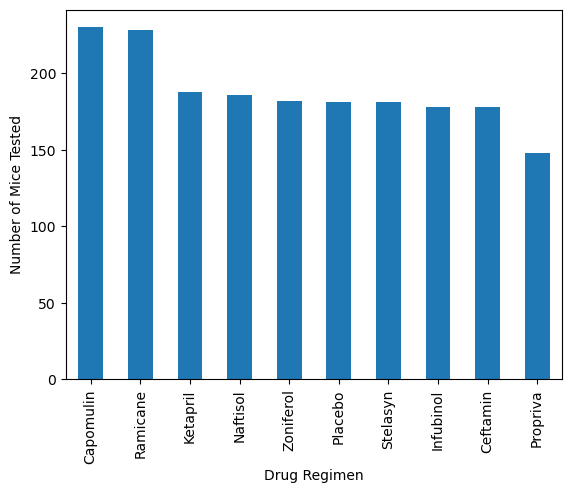

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_regimen = mouse_study_df["Drug Regimen"].value_counts()
#mice_per_regimen

dataframe_barplot = mice_per_regimen.plot(kind="bar", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
dataframe_barplot

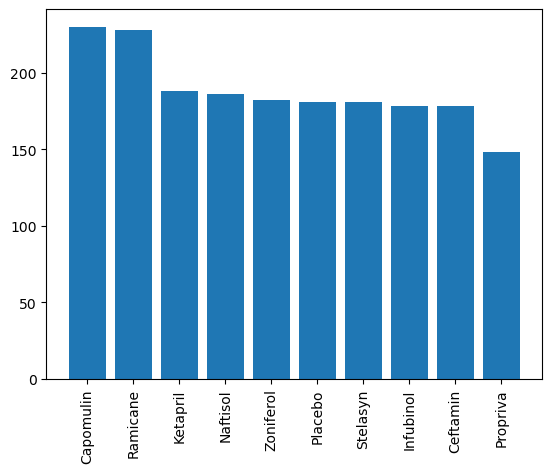

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_per_regimen.index.values
y_axis = mice_per_regimen.values

plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.xlabel="Drug Regimen"
plt.ylabel="Number of Mice"


plt.show()

<AxesSubplot:ylabel='Sex'>

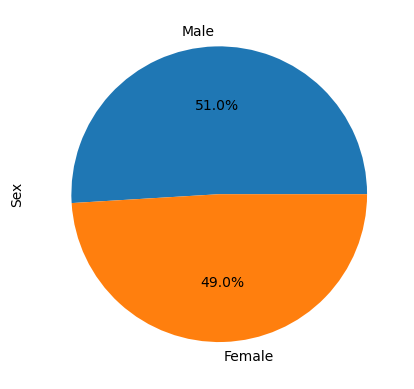

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_of_mice = mouse_study_df["Sex"].value_counts()
gender_of_mice

dataframe_pieplot = gender_of_mice.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")
dataframe_pieplot

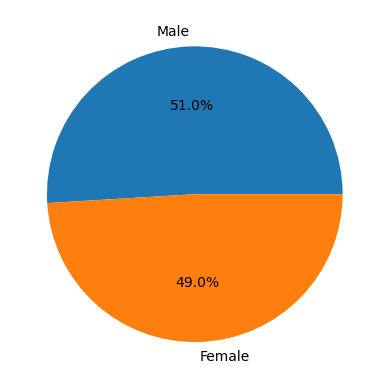

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#x_axis = gender_of_mice.index.values
labels = ["Male", "Female"]
y_axis = gender_of_mice.values

plt.pie(y_axis,autopct="%1.1f%%", labels=labels)
plt.ylabel="Sex"
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_df.groupby("Mouse ID").max("Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
group_df = pd.merge(last_timepoint_df, mouse_study_df, on=["Mouse ID", "Timepoint"])
group_df = group_df.rename(columns = {"Age_months_x": "Age",
                                     "Weight (g)_x": "Weight",
                                     "Tumor Volume (mm3)_x": "Tumor Volume (mm3)",
                                     "Metastatic Sites_x": "Metastatic Sites"})
group_df = group_df.loc[:,("Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age", "Weight", "Tumor Volume (mm3)", "Metastatic Sites")]
group_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age,Weight,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,45.000000,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [71]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

for x in range(len(group_df)):
    if group_df.loc[x, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(group_df.loc[x, "Tumor Volume (mm3)"])
    if group_df.loc[x, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(group_df.loc[x, "Tumor Volume (mm3)"])
    if group_df.loc[x, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(group_df.loc[x, "Tumor Volume (mm3)"])
    if group_df.loc[x, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(group_df.loc[x, "Tumor Volume (mm3)"])
        
tumor_volume = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for q in range(len(tumor_volume)):
    quartiles = pd.Series(tumor_volume[q]).quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile-lowerquartile
    print(f"\n{treatments[q]}:")
    print(f"The lower quartile: {lowerquartile}.")
    print(f"The upper quartile: {upperquartile}.")
    print(f"The interquartile range: {iqr}.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerquartile - (1.5*iqr)
    upper_bound = upperquartile + (1.5*iqr)
    print(f"Values below {lower_bound} are potential outliers.")
    print(f"Values above {upper_bound} are potential outliers.")


Capomulin:
The lower quartile: 45.0.
The upper quartile: 46.74900552.
The interquartile range: 1.7490055199999972.
Values below 42.376491720000004 are potential outliers.
Values above 49.37251379999999 are potential outliers.

Ramicane:
The lower quartile: 45.0.
The upper quartile: 46.34383237.
The interquartile range: 1.3438323700000012.
Values below 42.984251445 are potential outliers.
Values above 48.359580925 are potential outliers.

Infubinol:
The lower quartile: 54.04860769.
The upper quartile: 65.52574285.
The interquartile range: 11.477135160000003.
Values below 36.83290494999999 are potential outliers.
Values above 82.74144559000001 are potential outliers.

Ceftamin:
The lower quartile: 48.72207785.
The upper quartile: 64.29983003.
The interquartile range: 15.577752179999997.
Values below 25.355449580000002 are potential outliers.
Values above 87.66645829999999 are potential outliers.


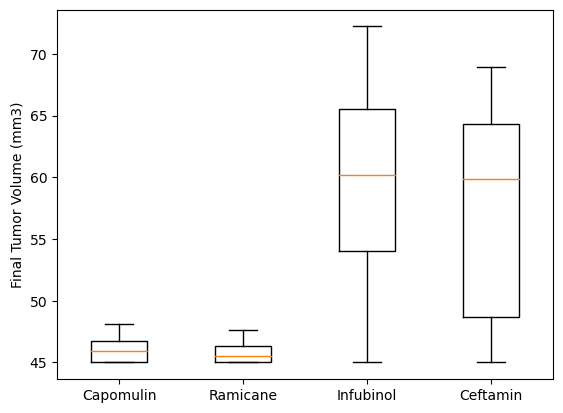

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "r", marker = "o")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume, flierprops = red_dot)
ax1.set_xticklabels(treatments)
plt.show()


## Line and Scatter Plots

TypeError: 'str' object is not callable

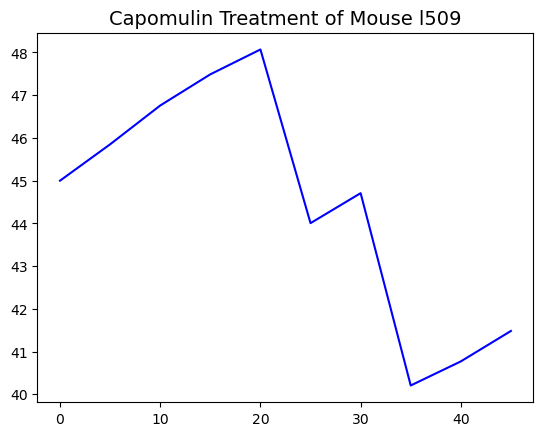

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
group_df.loc[group_df["Drug Regimen"] == "Capomulin"].head()
l509_tumor = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="l509"]
#l509_tumor
plt.plot(l509_tumor["Timepoint"],l509_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse l509", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

TypeError: 'str' object is not callable

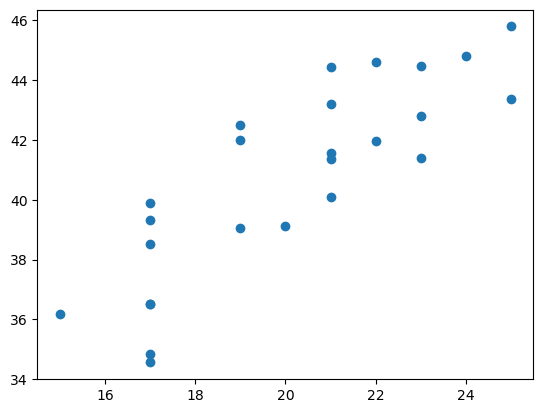

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_study_df.loc[mouse_study_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_volume = capomulin["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

TypeError: 'str' object is not callable

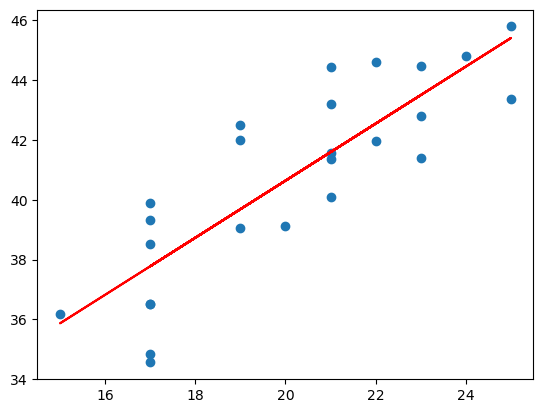

In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()
